In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot

# Delivery Data

In [ ]:
DT=pd.read_csv('delivery_time.csv')
DT

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [ ]:
DT.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


In [ ]:
DT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [ ]:
DT=DT.rename({'Delivery Time':'Del','Sorting Time':'Sor'},axis=1)
DT

,Del,Sor
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [ ]:
model1=smf.ols('Del~Sor',data=DT).fit()

In [ ]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Del   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Tue, 30 Aug 2022   Prob (F-statistic):           3.98e-06
Time:                        17:37:49   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5827      1.722      3.823      0.001       2.979      10.186
Sor            1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

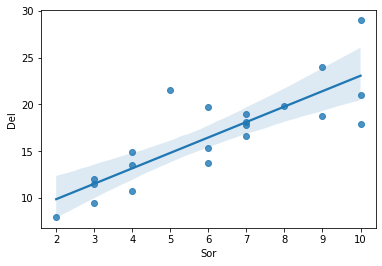

In [ ]:
sns.regplot(x='Sor',y='Del',data=DT)

In [ ]:
model1.params

Intercept    6.582734
Sor          1.649020
dtype: float64

In [ ]:
print(model1.tvalues, '\n', model1.pvalues)

Intercept    3.823349
Sor          6.387447
dtype: float64 
 Intercept    0.001147
Sor          0.000004
dtype: float64


In [ ]:
(model1.rsquared,model1.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

In [ ]:
ml_influence=model1.get_influence()
(s,_)=ml_influence.cooks_distance
s

array([5.65174628e-02, 6.05802657e-04, 3.28610455e-02, 5.27064095e-02,
       4.62053041e-01, 3.89480081e-03, 2.60419093e-03, 3.96028930e-02,
       3.51953954e-01, 5.67854347e-02, 1.49639848e-05, 3.46421730e-02,
       7.12499306e-03, 8.53239427e-06, 2.40503559e-03, 1.69949775e-02,
       2.28073073e-02, 8.58728156e-07, 5.65138719e-02, 2.98356431e-04,
       1.70820972e-01])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


Text(0, 0.5, 'Cooks Distance')

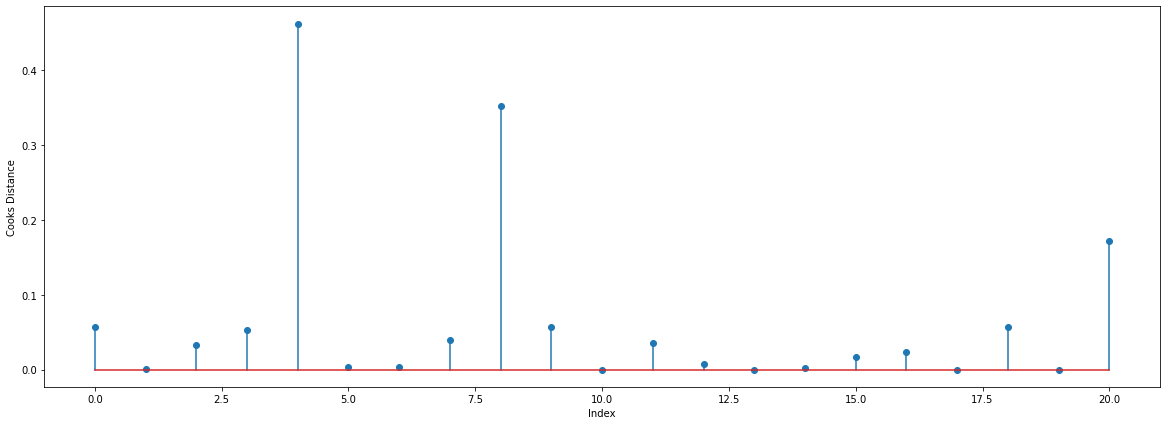

In [ ]:
fig=plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(DT)),np.round(s,3))
plt.xlabel('Index')
plt.ylabel('Cooks Distance')

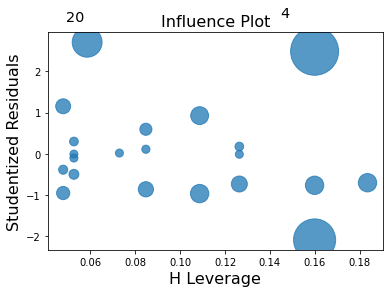

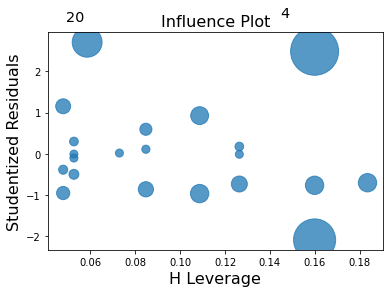

In [ ]:
influence_plot(model1)

In [ ]:
np.argmax(s),np.max(s)

(4, 0.462053041265031)

In [ ]:
DT1=DT.drop(DT.index[[4,8,20]],axis=0).reset_index()
DT1

,index,Del,Sor
0,0,21.00,10
1,1,13.50,4
2,2,19.75,6
3,3,24.00,9
4,5,15.35,6
5,6,19.00,7
6,7,9.50,3
7,9,18.75,9
8,10,19.83,8
9,11,10.75,4


In [ ]:
DT1=DT1.drop(['index'],axis=1)
DT1

,Del,Sor
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,15.35,6
5,19.00,7
6,9.50,3
7,18.75,9
8,19.83,8
9,10.75,4


In [ ]:
mld=smf.ols('Del~Sor',data=DT1).fit()

In [ ]:
mld.summary()

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Del   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     79.94
Date:                Tue, 30 Aug 2022   Prob (F-statistic):           1.27e-07
Time:                        17:37:50   Log-Likelihood:                -35.450
No. Observations:                  18   AIC:                             74.90
Df Residuals:                      16   BIC:                             76.68
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.0240      1.175      5.126      0.000       3.533       8.515
Sor            1.6741      0.187      8.941      0.000       1.277       2.071
==============================================================================
Omnibus:                        1.044   Durbin-Watson:                   1.691
Prob(Omnibus):                  0.593   Jarque-Bera (JB):                0.959
Skew:                           0.447   Prob(JB):                        0.619
Kurtosis:                       2.307   Cond. No.                         17.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# by Trial & Error we get this is the model which has best & highest R-squared Value.

In [ ]:
mld.predict(DT)

0     22.764761
1     12.720305
2     16.068457
3     21.090685
4     22.764761
5     16.068457
6     17.742533
7     11.046229
8     22.764761
9     21.090685
10    19.416609
11    12.720305
12    17.742533
13    11.046229
14    11.046229
15    12.720305
16    16.068457
17    17.742533
18     9.372153
19    17.742533
20    14.394381
dtype: float64

# Salary

In [ ]:
Salary=pd.read_csv('Salary_Data.csv')
Salary

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [ ]:
Salary.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [ ]:
Salary.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [ ]:
Salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [ ]:
model2=smf.ols('Salary~YearsExperience',data=Salary).fit()

In [ ]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Tue, 30 Aug 2022   Prob (F-statistic):           1.14e-20
Time:                        17:37:50   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

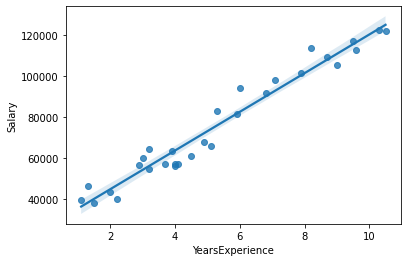

In [ ]:
sns.regplot(x='YearsExperience',y='Salary',data=Salary)

In [ ]:
model2.predict(Salary)

0      36187.158752
1      38077.151217
2      39967.143681
3      44692.124842
4      46582.117306
5      53197.090931
6      54142.087163
7      56032.079627
8      56032.079627
9      60757.060788
10     62647.053252
11     63592.049484
12     63592.049484
13     64537.045717
14     68317.030645
15     72097.015574
16     73987.008038
17     75877.000502
18     81546.977895
19     82491.974127
20     90051.943985
21     92886.932681
22    100446.902538
23    103281.891235
24    108006.872395
25    110841.861092
26    115566.842252
27    116511.838485
28    123126.812110
29    125016.804574
dtype: float64